## This is a learning tutorial project on how a DS&ML project looks like. It is not independent, I am doing it via watching training videos. Thus, most of the coding is not my production, however, I understand every step that is done.

### Source: codebasics YT

## 1) Data Cleaning

In [195]:
import pandas as pd
import numpy as np

In [196]:
df_original = pd.read_csv('/kaggle/input/bengalru-house-pricess/bengaluru_house_prices (1).csv')

In [197]:
df = df_original.copy()
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [198]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [199]:
df.shape

(13320, 9)

#### Let's first examine the area type column

In [200]:
df.groupby('area_type')['area_type'].agg('count')


#('area_type') - column to group by
#['area_type'] - column to apply aggregate function - count

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

**NOTE**: It could have been done using value counts too:

In [201]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

Now we'll drop some columns we assume that doesn't affect the prediction that much - like they're useless or less useful.


#### **NOTE**: Determining which column to use cannot be that easy sometimes and there are several methods to check which columns to drop:
- Correlation Analysis
- Recursive Feature Elimination
- Variance threshold


In [202]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [203]:
cols_to_drop = ['area_type', 'availability', 'society', 'balcony']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [204]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [205]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since NaN rows are very small in number, we can safely drop all of them. But if they were larger, we might have used imputer to fill nulls with median, mode or mean.

In [206]:
df.shape

(13320, 5)

In [207]:
df = df.dropna()
df.shape

(13246, 5)

13320 - 13246 = 74, we got rid of 74 nulls. When we count all nulls seperately, we see that it's bigger than 74 - it might be because some rows contain nulls that are associated to more than one columns.

In [208]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#### Analyzing 'size' feature

In [209]:
# All unique values for size column

df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

BHK = Bedroom, we only want to keep numbers.

In [210]:
# Split the size column by space, then take first element - number

df['bhk_size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [211]:
df.head()

,location,size,total_sqft,bath,price,bhk_size
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [212]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk_size        int64
dtype: object

Alternatively, we might have used a different method: removing all non-numericals directly using a lambda function:

**import re** 

**remove_non_numerical = lambda col: re.sub('[^0-9]', '', col) if isinstance(col, str) else col**

and afterwards apply it to the columns, then change datatype to float or int from object:

**df[numerical_columns] = df[numerical_columns].applymap(remove_non_numerical)**


**df[numerical_columns] = df[numerical_columns].astype('float64')**


In [213]:
df['bhk_size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

Now all values are integers. We notice there is a relatively odd value, 43. Let's see the whole row.

In [214]:
df[df['bhk_size'] == 43]

,location,size,total_sqft,bath,price,bhk_size
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


total sqft = 2400 (~220 m2) and 43 bedroom size? Seems like an error, but let's analyze total_sqft column first.

In [215]:
unique_values = df['total_sqft'].unique()

In [216]:
for value in unique_values:
    print(value)

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
1330.74
970
1459
800
869
1270
1670
2010
1185
1600
1500
1407
840
4395
845
5700
1160
3000
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
1326
1325
1499
1665
708
1060
710
1450
2894
1330
2502
650
2400
1007
966
1630
1640
782
1260
1413
1116
1530
3700
2497
1436
276
1427
2061
3067 - 8156
2650
1282
1050
945
950
1870
880
1535
1360
1042 - 1105
1280
5000
3050
1563.05
1167
4000
1828
890
1612
1034
1710
957
2795
1125
1735
2050
3750
1063
1904
4200
2000
1145 - 1340
1425
1470
1300
450
1152
1550
400
705
770
1242
1700
2144
1704
1846
1340
1015 - 1540
1327
1186
1783
1400
980
1285
912
1225
1909
1359
1207
1736
2850
1595
1798
1475
1580
1295
3600
589
1415
1787
984
2405
1080
1900
805
1153
1148
1110
1933
3500
645
1644
910
1577
4050
2420
900
1108
3045
2900
1162
1035
1464
1866
1804
913

We see numbers, entries indicating the unit (meters, arcs, yards and etc) and ranges like 1133 - 1384. 

Let's first deal with ranges

In [217]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

Function tries to assign dtype to float, when successfull, returns True. If it cannot, it returns False.

In [218]:
# Selecting rows where an entry withing total_sqft CANNOT be assigned to float

# ~ indicates not, so all outputs are the ones that are False from is_float

df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk_size
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [219]:
def convert_range_to_num(x):
    split_entry = x.split('-')
    
    if len(split_entry) == 2:
        return (float(split_entry[0]) + float(split_entry[1])) / 2
    try:
        return float(x)
    except:
        return None

Function takes entry and splits it by "-". If it doesn't contain -, it'll stay as it is.

Then we check if length is 2, for example, if entry is 1133-1384, len split_entry is 2 as it is [1133, 1384]. Then we take the mean of these 2 numbers and return the mean as float dtype.

If the length is not 2, we try to convert the entry to float. If it is 1345, for example, it'll be returned as it is but in float type, cuz all entries are strings at the moment.

If it can't be returned as float, for the case of 132Sq meters, for example, we will assign NaN for them and drop them later on.

In [220]:
df['total_sqft'] = df['total_sqft'].apply(convert_range_to_num)

In [221]:
df.loc[30, 'total_sqft']

2475.0

30th element of total sqft was 2100 - 2850. Now it is 2475, the mean of these values.

#### **NOTE**: In the function "convert_range_to_num", instead of return None, I originally used return x, to see the values with different units. Then, I cleaned them, converted all the units to square feets. But the values were exceptionally large. Thus, the values with different units were not written properly, even after conversion, they were like outliers. Therefore, it is better to just drop them as they are only 73 in count. 

In [222]:
# Check if all values are properly converted to float

df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk_size


In [223]:
df.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk_size        int64
dtype: object

In [224]:
df.shape

(13246, 6)

In [225]:
df[df.total_sqft.isnull()]

,location,size,total_sqft,bath,price,bhk_size
410,Kengeri,1 BHK,NaN,1.0,18.50,1
648,Arekere,9 Bedroom,NaN,9.0,265.00,9
775,Basavanagara,1 BHK,NaN,2.0,93.00,1
872,Singapura Village,2 BHK,NaN,2.0,45.00,2
1019,Marathi Layout,1 Bedroom,NaN,1.0,110.00,1
1086,Narasapura,2 Bedroom,NaN,2.0,29.50,2
1400,Chamrajpet,9 BHK,NaN,9.0,296.00,9
1712,Singena Agrahara,3 Bedroom,NaN,3.0,95.00,3
1743,Hosa Road,3 BHK,NaN,3.0,115.00,3
1821,Sarjapur,3 Bedroom,NaN,3.0,76.00,3


In [226]:
# Store clean df

df_clean = df.copy()

## 2) Feature Engineering / Dimensionality Reduction

Price per sqft is an essential parameter in house pricing and this column will help us in the Outliers detection Stage.

In [227]:
df['price_per_sqft'] = df.price*100000/df.total_sqft
df.head()

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [228]:
df[df.price_per_sqft.isnull()]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft
410,Kengeri,1 BHK,NaN,1.0,18.50,1,NaN
648,Arekere,9 Bedroom,NaN,9.0,265.00,9,NaN
775,Basavanagara,1 BHK,NaN,2.0,93.00,1,NaN
872,Singapura Village,2 BHK,NaN,2.0,45.00,2,NaN
1019,Marathi Layout,1 Bedroom,NaN,1.0,110.00,1,NaN
1086,Narasapura,2 Bedroom,NaN,2.0,29.50,2,NaN
1400,Chamrajpet,9 BHK,NaN,9.0,296.00,9,NaN
1712,Singena Agrahara,3 Bedroom,NaN,3.0,95.00,3,NaN
1743,Hosa Road,3 BHK,NaN,3.0,115.00,3,NaN
1821,Sarjapur,3 Bedroom,NaN,3.0,76.00,3,NaN


The NaN values are the same for total_sqft as NaN/smth is also NaN

In [229]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [230]:
len(df.location.unique())

1304

There are 1304 unique locations. We should somehow reduce it because when doing One-Hot Encoding, it'll create problems - DIMENSIONALITY CURSE. 1304 is too much.

In [231]:
df.location.value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

There are some locations with high data points, some of them have just one. Let's define our threshold as 10 and call any location less than 10 data points 'Other'.

In [232]:
location_counts = df['location'].value_counts()
location_less_than_10 = location_counts[location_counts < 10]
location_less_than_10

location
Chennammana Kere           9
Vishwanatha Nagenahalli    9
Jakkur Plantation          9
2nd Phase JP Nagar         9
B Narayanapura             9
                          ..
Vidyapeeta                 1
Maruthi Extension          1
Okalipura                  1
Old Town                   1
Abshot Layout              1
Name: count, Length: 1051, dtype: int64

In [233]:
len(location_less_than_10)

1051

So we have 1051 values which appear less than 10 times. Let's store them as 'Other'

In [234]:
df.location = df.location.apply(lambda x: 'Other' if x in location_less_than_10 else x)

In [235]:
df.head(10)

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [236]:
len(df.location.unique())

254

So we have 254 unique values for location, which is much less than original value 1304.

## 3) Outlier Detection & Removal

### 3.1) Square feet per Bedroom

Instead of dealing with total_sqft and bhk_size individually, we may create another feature called sqft_per_bhk and analyze it. Because we may have large numbers for bhk and if the sqft is also large then it's ok, but if there's anomality, we'll see it from ratio.

In [237]:
df['sqft_per_bhk'] = df['total_sqft']/df['bhk_size']

In [238]:
df.head()

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0


Let's say we go to our business manager and he says it is impossible we have less than 300 for sqft per bhk, it's very unusual. In that case, we get that **threshold** from them and apply it to our data.

In [239]:
df[df['sqft_per_bhk'] < 300]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804,170.000000
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333,75.000000
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810,234.500000
68,Other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296,168.750000
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000,166.666667
...,...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571,200.000000
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333,200.000000
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091,275.000000
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649,154.800000


In [240]:
df.shape

(13246, 8)

In [241]:
df = df[df['sqft_per_bhk'] > 300]

In [242]:
df.shape

(12274, 8)

### 3.2) Price per Square Feet

In [243]:
df['price_per_sqft'].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

We'll use z-scores for outlier removal. We'll take a look at z-scores in range (-1, 1), (-2, 2) and (-3, 3) and decide which ones to get rid of.

Theory behind it is that if the dataset is normally distributed, around 68% of data is within 1 standard deviation of the mean, 95% around 2 standard deviations and 99.7% 3 standard deviations. This 1 2 and 3 st.devs are actually z-scores of the data point.

In [244]:
from scipy.stats import zscore

df['z_score_price_per_sqft'] = zscore(df['price_per_sqft'])

In [245]:
df.head()

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0,-0.619797
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.0,-0.393900
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0,-0.470343
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0,0.008391
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0,-0.484050


In [246]:
df[(df['z_score_price_per_sqft'] < -1) | (df['z_score_price_per_sqft'] > 1)]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.818182,825.000000,2.953316
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592.459605,696.250000,1.080811
18,Other,3 BHK,2770.0,4.0,290.0,3,10469.314079,923.333333,1.050427
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571.428571,700.000000,1.815805
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250.000000,400.000000,2.476683
...,...,...,...,...,...,...,...,...,...
13290,Sarjapur Road,4 BHK,4050.0,2.0,450.0,4,11111.111111,1012.500000,1.208776
13296,Cox Town,2 BHK,1200.0,2.0,140.0,2,11666.666667,600.000000,1.345847
13305,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000.000000,500.000000,9.323379
13316,Other,4 BHK,3600.0,5.0,400.0,4,11111.111111,900.000000,1.208776


In [247]:
df[(df['z_score_price_per_sqft'] < -2) | (df['z_score_price_per_sqft'] > 2)]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.818182,825.000000,2.953316
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250.000000,400.000000,2.476683
159,Mahalakshmi Layout,4 Bedroom,3750.0,4.0,760.0,4,20266.666667,937.500000,3.467706
185,Other,3 Bedroom,1846.0,3.0,300.0,3,16251.354280,615.333333,2.477017
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,712.500000,2.172602
...,...,...,...,...,...,...,...,...,...
13200,Other,6 Bedroom,8000.0,6.0,2800.0,6,35000.000000,1333.333333,7.102829
13233,Other,3 BHK,1903.0,2.0,293.0,3,15396.741986,634.333333,2.266161
13261,Other,3 Bedroom,2000.0,2.0,360.0,3,18000.000000,666.666667,2.908457
13262,Other,2 BHK,1140.0,1.0,185.0,2,16228.070175,570.000000,2.471272


In [248]:
df[(df['z_score_price_per_sqft'] < -3) | (df['z_score_price_per_sqft'] > 3)]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
159,Mahalakshmi Layout,4 Bedroom,3750.0,4.0,760.0,4,20266.666667,937.500000,3.467706
545,Other,3 Bedroom,2610.0,3.0,499.0,3,19118.773946,870.000000,3.184489
743,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719.165085,1317.500000,4.319534
861,Other,4 Bedroom,2400.0,4.0,640.0,4,26666.666667,600.000000,5.046764
1044,Other,6 Bedroom,3968.0,5.0,900.0,6,22681.451613,661.333333,4.063501
...,...,...,...,...,...,...,...,...,...
13019,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509.803922,408.000000,4.514606
13067,Other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350,715.000000,10.890015
13197,Other,4 Bedroom,9200.0,4.0,2600.0,4,28260.869565,2300.000000,5.440098
13200,Other,6 Bedroom,8000.0,6.0,2800.0,6,35000.000000,1333.333333,7.102829


In [249]:
df[(df['z_score_price_per_sqft'] < -4) | (df['z_score_price_per_sqft'] > 4)]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
743,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719.165085,1317.500000,4.319534
861,Other,4 Bedroom,2400.0,4.0,640.0,4,26666.666667,600.000000,5.046764
1044,Other,6 Bedroom,3968.0,5.0,900.0,6,22681.451613,661.333333,4.063501
1094,Other,4 Bedroom,2400.0,5.0,775.0,4,32291.666667,600.000000,6.434608
1299,Chamrajpet,9 Bedroom,4050.0,7.0,1200.0,9,29629.629630,450.000000,5.777810
...,...,...,...,...,...,...,...,...,...
13019,HAL 2nd Stage,5 Bedroom,2040.0,4.0,500.0,5,24509.803922,408.000000,4.514606
13067,Other,10 Bedroom,7150.0,13.0,3600.0,10,50349.650350,715.000000,10.890015
13197,Other,4 Bedroom,9200.0,4.0,2600.0,4,28260.869565,2300.000000,5.440098
13200,Other,6 Bedroom,8000.0,6.0,2800.0,6,35000.000000,1333.333333,7.102829


So far we've tried 4 ranges. The selection of outliers really depends on our intuition. One way to do it is taking a look at the box plots. Let's try it out.

In [250]:
df_1 = df[(df['z_score_price_per_sqft'] > -1) & (df['z_score_price_per_sqft'] < 1)]
df_2 = df[(df['z_score_price_per_sqft'] > -2) & (df['z_score_price_per_sqft'] < 2)]
df_3 = df[(df['z_score_price_per_sqft'] > -3) & (df['z_score_price_per_sqft'] < 3)]
df_4 = df[(df['z_score_price_per_sqft'] > -4) & (df['z_score_price_per_sqft'] < 4)]

Text(0.5, 1.0, 'Z-score range (-4, 4)')

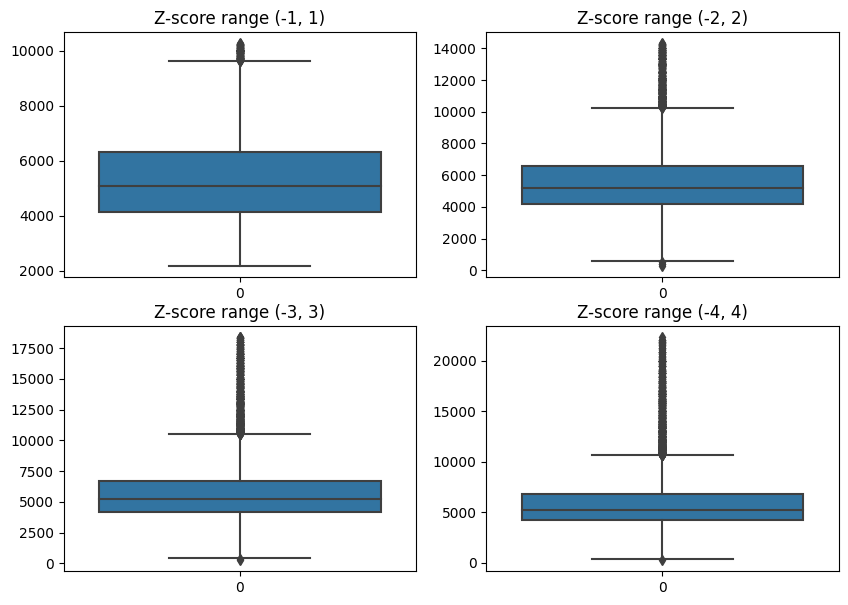

In [251]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))

sns.boxplot(df_1['price_per_sqft'], ax = axes[0, 0])
sns.boxplot(df_2['price_per_sqft'], ax = axes[0, 1])
sns.boxplot(df_3['price_per_sqft'], ax = axes[1, 0])
sns.boxplot(df_4['price_per_sqft'], ax = axes[1, 1])

axes[0, 0].set_title('Z-score range (-1, 1)')
axes[0, 1].set_title('Z-score range (-2, 2)')
axes[1, 0].set_title('Z-score range (-3, 3)')
axes[1, 1].set_title('Z-score range (-4, 4)')

It's as expected that when we filter for **range (-1, 1)**, we get the **best** results as the data points are the closest to the mean. However, we need to consider the length of dataset after we remove outliers.

Length of outliers for ranges are:
**(-1, 1) - 1107 rows**
(-2, 2) - 460 rows
(-3, 3) - 195 rows
(-4, 4) - 100 rows

Since our dataframe has ~ 12k rows now, it seems safe to drop 1107 rows. However, it should be noted that it depends on how much data we are ready to lose.

In [252]:
df = df[(df['z_score_price_per_sqft'] > -1) & (df['z_score_price_per_sqft'] < 1)]
df.shape

(11167, 9)

From box plot, we see that we still have some potential outliers above roughly 9300-10000, let's take a look at them.

In [253]:
df[df['price_per_sqft'] > 9300]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
121,Akshaya Nagar,3 BHK,2061.0,3.0,200.0,3,9704.027171,687.000000,0.861610
163,Whitefield,4 Bedroom,4200.0,4.0,420.0,4,10000.000000,1050.000000,0.934634
178,Malleshwaram,1 BHK,705.0,1.0,67.0,1,9503.546099,705.000000,0.812145
334,Ulsoor,3 BHK,2135.0,3.0,215.0,3,10070.257611,711.666667,0.951969
455,Other,4 Bedroom,3309.0,4.0,325.0,4,9821.698398,827.250000,0.890642
...,...,...,...,...,...,...,...,...,...
13020,5th Phase JP Nagar,4 Bedroom,2400.0,4.0,228.0,4,9500.000000,600.000000,0.811271
13075,Hebbal,3 BHK,2250.0,3.0,219.0,3,9733.333333,750.000000,0.868840
13095,Other,4 BHK,6652.0,6.0,660.0,4,9921.828022,1663.000000,0.915347
13192,Other,3 BHK,1490.0,3.0,140.0,3,9395.973154,496.666667,0.785604


They seem ok. Although they may be real data points, they still will create problems for our model. Thus, we may get rid of them or ask our business manager if it is okay to do so. At the moment, I take initiative and remove them too.

In [254]:
df = df[df['price_per_sqft'] < 9300]

<Axes: >

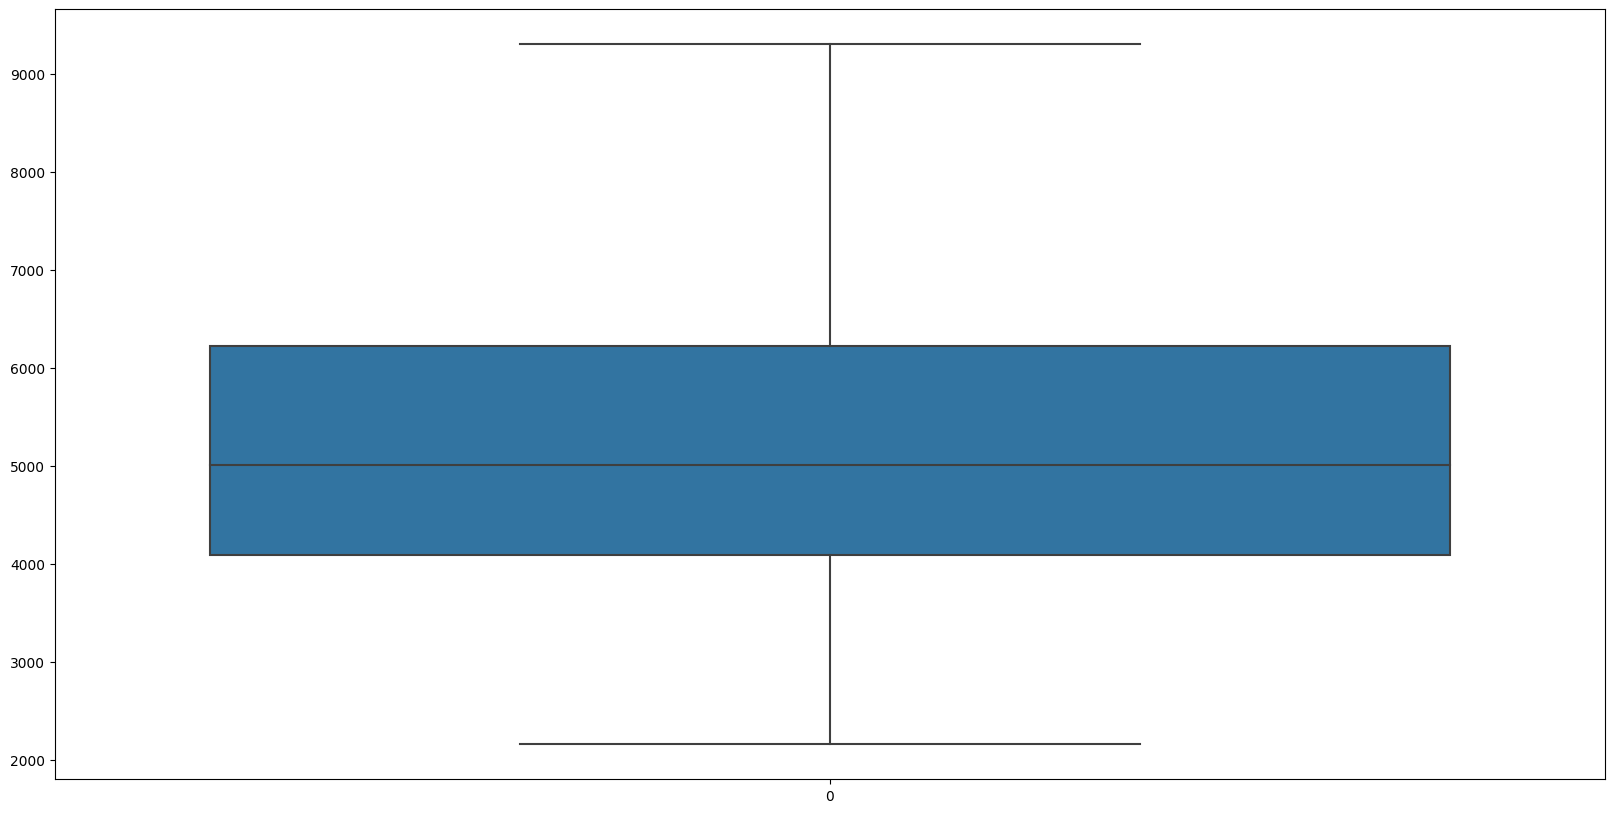

In [255]:
sns.boxplot(df['price_per_sqft'])

In [256]:
df.shape

(10926, 9)

Now we're okay.

### 3.3) BHK_SIZE

Let's say we have a rule that for same area and location, if we have 2 bedroom home and 3 bedroom home, price of 3 bedroom home must be higher, otherwise it's considered as an outlier. Let's visually examine this

In [257]:
import matplotlib
from matplotlib import pyplot as plt

def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.bhk_size ==2)]
    bhk3 = df[(df.location == location) & (df.bhk_size ==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)  # set figsize to 15,10 for all future plots
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50) #s - size of markers
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'red', label = '3 BHK', s = 50, marker = '+') #s - size of markers
    plt.xlabel('Total area(sqft)')
    plt.ylabel('Price')
    plt.legend()

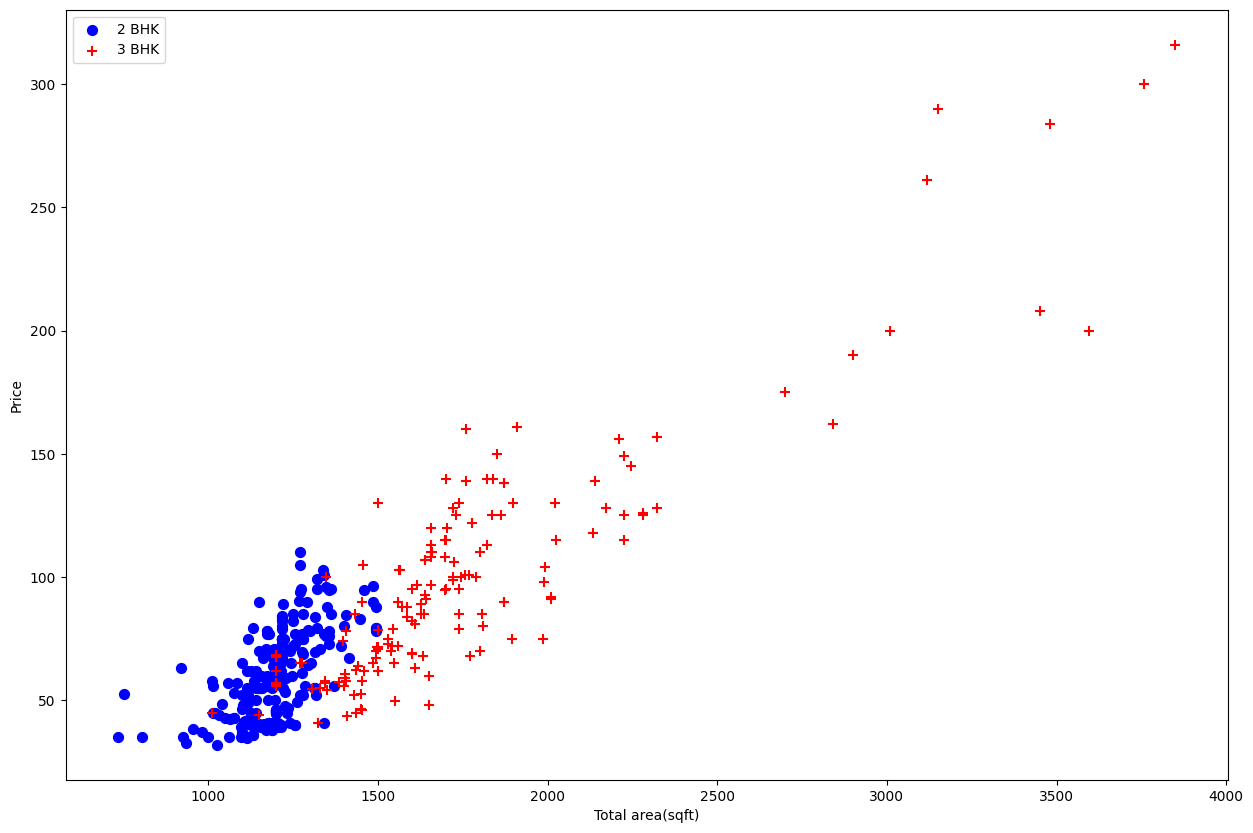

In [258]:
plot_scatter(df, 'Whitefield')

So we see some red marks that are below the blue ones for ~ same area. They are considered as outliers. We need to write a function where it takes for the same location and area, if price of apartment is less than the 'mean' price of apartment with 1 less bedroom, remove it. **We'll use the price_per_sqft because we wanna compare the points for approximately same area.**

In [259]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk_size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk_size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

**exclude_indices** - empty array which will store indices of to be removed rows

----------------------------------------------------------------------------
**outer for loop** - loops through each location in df.groupby('location'). Here, 
location - unique locations - Whitehouse, Rajaji Nagar and etc.
location_df - portion of df containing only 1 location - other columns are values assigned to this location. For example:

**Whitehouse**   1   34

**Whitehouse**   3   23

**Whitehouse**   7   12

and 

**Rajaji Nagar**   3    31

**Rajaji Nagar**   5    23

**Rajaji Nagar**   6    32

and etc.

-------------------------------------------------------------------------------
**bhk_stats** - empty dictionary which will store stats for each bhk

-------------------------------------------------------------------------------
**inner for loop -** loops throguh each bhk in *df_location.groupby*, not df. Because we wanna look for the same location. Here, 
bhk - bedroom counts, 1,2, 3 and etc
bhk_df - portion of df_location where all other columns are associated to only 1 bedroom. For example, 

Whitehouse  **1**   34

Whitehouse  **1**   36

Whitehouse  **1**   98

and

Whitehouse  **2**   83 

Whitehouse  **2**   85

Whitehouse  **2**   89

and etc.

**NOTE**: Since it is the inner for loop, it will we will have dataframes for each bhk but only 1 location. Then for another location, we'll look for each bhk too - outer loop starts only when inner loop ends.

-------------------------------------------------------------------------------
bhk_stats[bhk] - the bhk in square brackets is the **key** for our dictionary. 

-------------------------------------------------------------------------------
**second inner for loop** - again loops through each bhk. There, 

*stats = bhk_stats.get(bhk-1)* - accessing the apartment with 1 less bedrooms(bhk). We use bhk key here, for example, if current bhk = 2, we wanna acccess bhk=1.

*if stats and stats['count']>5* - if we indeed have bhk = 1 and the number of apartments with 1 bedroom is more than 5, then, 

*exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)*  - append indices array if current bhk's price per square feet is less than previous bhk's mean. Like if price for 2 bedroom apartment is less than 1 all bedroom apartments mean price, it is an outlier thus we get an index of it.

-------------------------------------------------------------------------------
**.index.values** - get indices (row numbers)


#### At the end, function looks for each location, and for each location if the price for n bedroom apartment is less than the mean price for n-1 bedroom apartments, we drop the rows containing those apartments.

In [260]:
df = remove_bhk_outliers(df)

df.shape

(7954, 9)

Approximately we got rid of 3k rows. The value previously was 10k+.

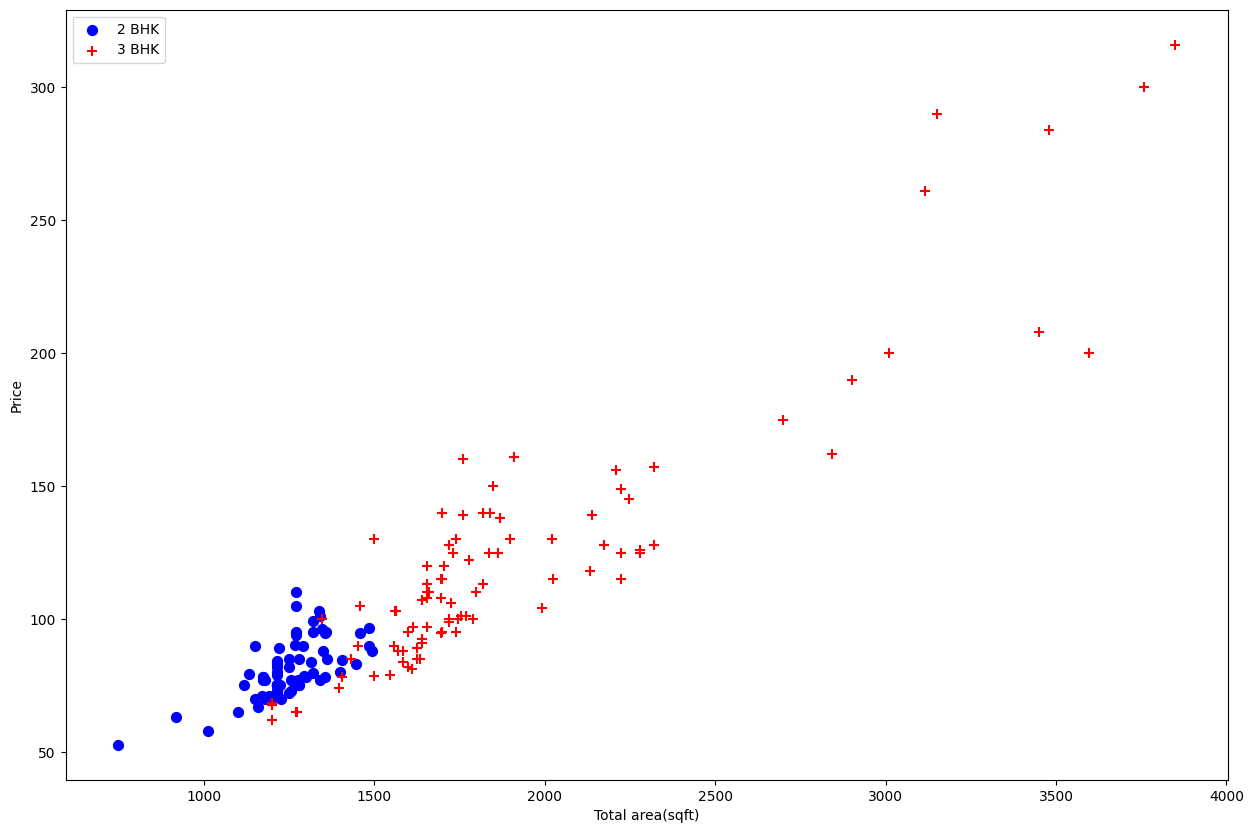

In [261]:
# See the same scatter plot after we got rid of outliers again

plot_scatter(df, 'Whitefield')

We see some of the red points under blue ones are gone. There are still some (in this case only 1) but it is ok.

### 3.4) Histograms + Bath feature

Text(0, 0.5, 'Count')

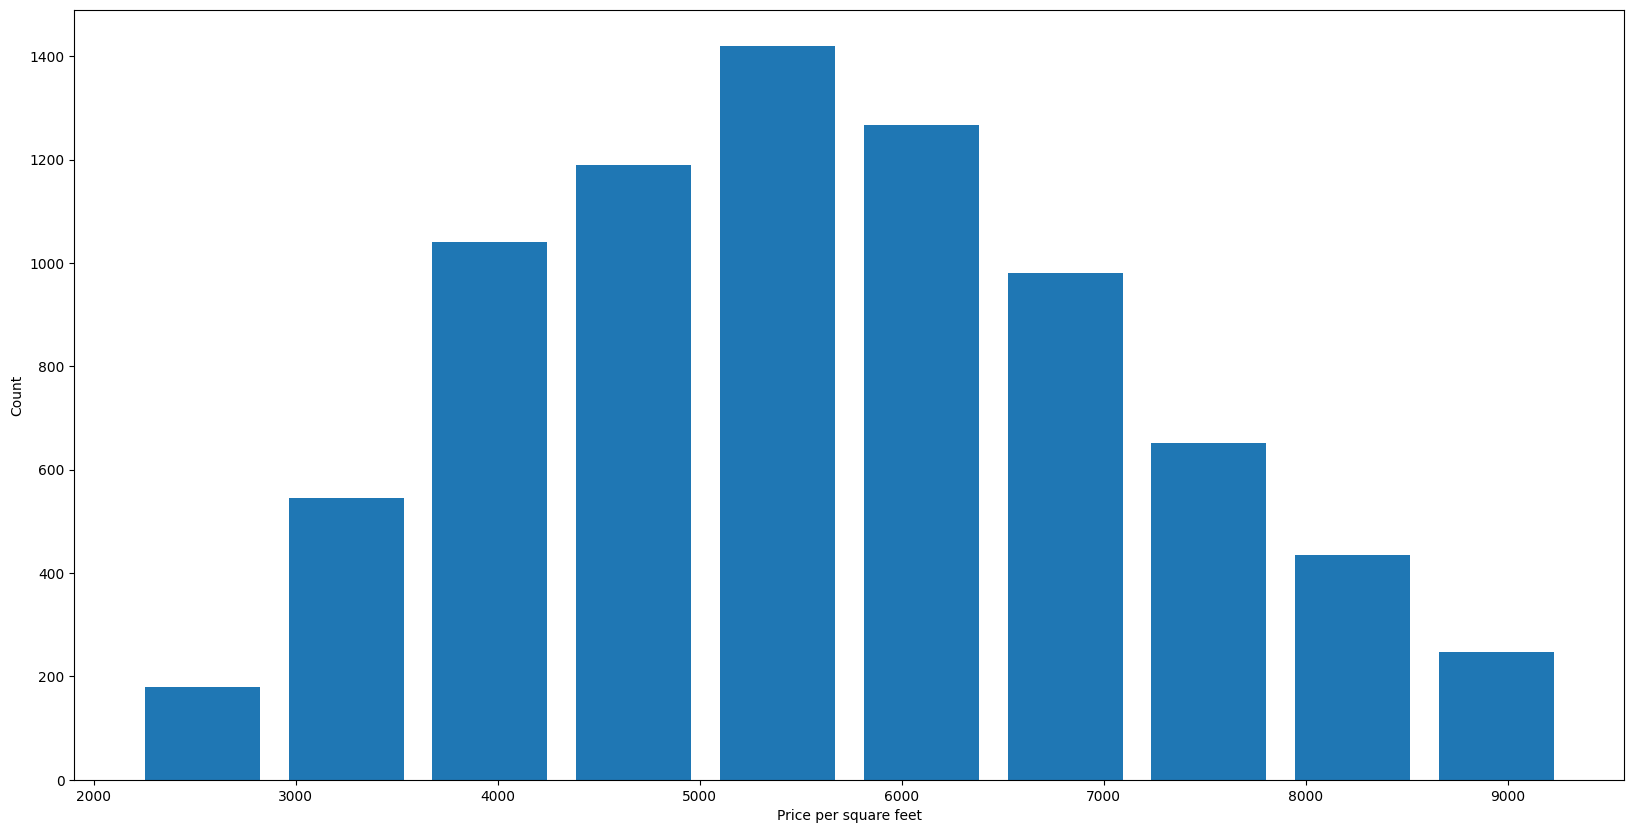

In [262]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

plt.hist(df.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [263]:
df.bath.unique()

array([ 2.,  3.,  4.,  1.,  8.,  6.,  5.,  7.,  9., 12., 16., 10., 13.])

13, 16 bathrooms? Let's see what's going on

In [264]:
df[df.bath > 10]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
3096,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000,1200.000000,-0.453209
3609,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000,625.000000,-0.175641
7979,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000,545.454545,-0.915824
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000,400.000000,-0.545732
9935,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424,417.307692,-0.281950


Say after discussing with business manager, we agree on that any time we have number of bathrooms greater than number of bedrooms + 2 -> bath>bhk_size+2

Text(0, 0.5, 'Count')

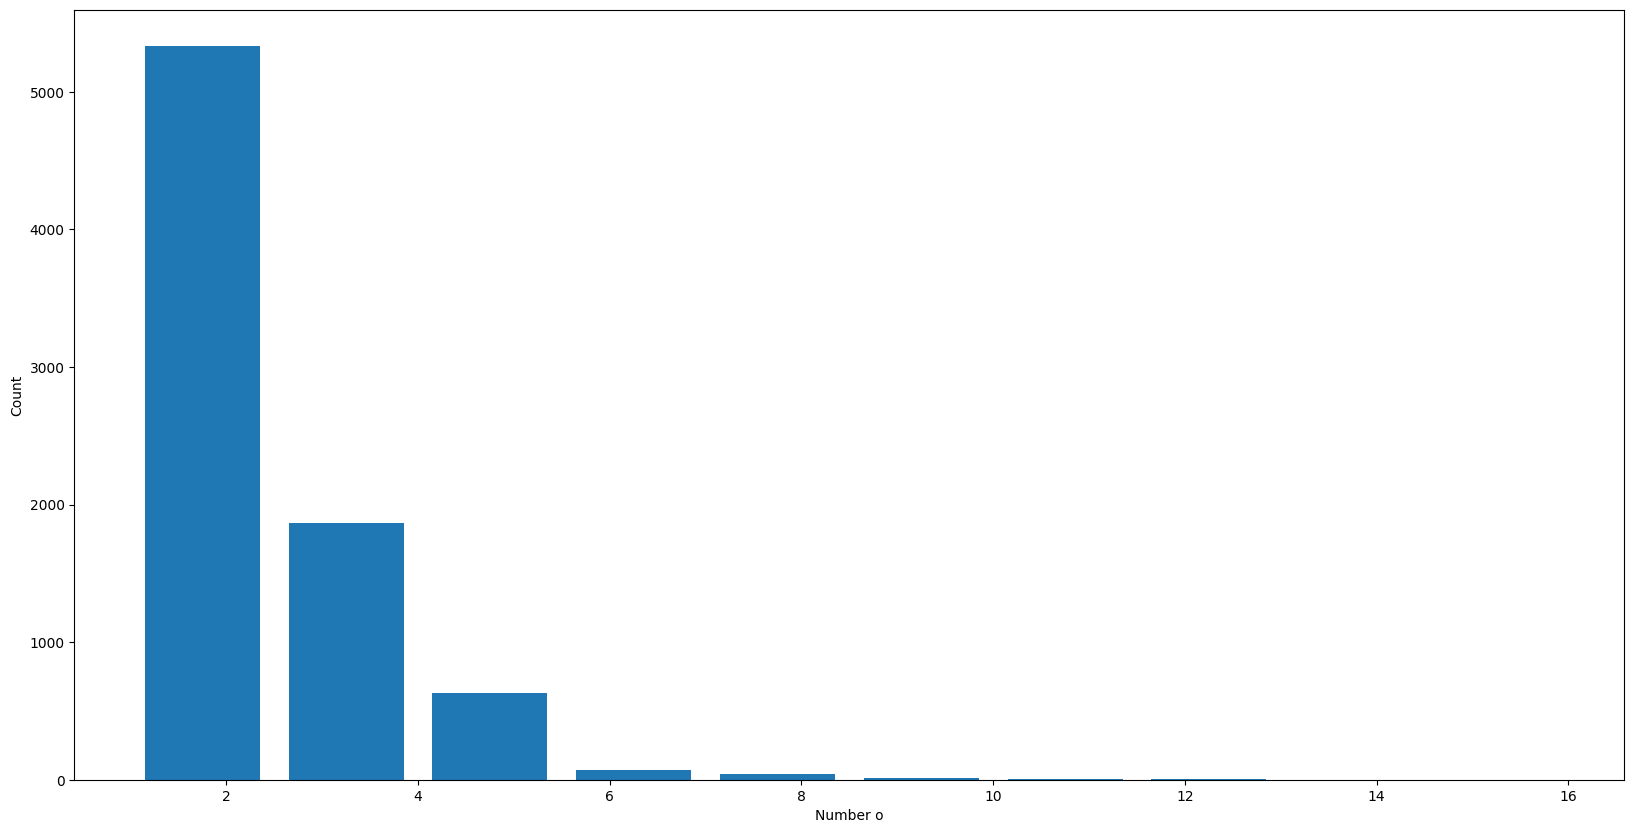

In [265]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

plt.hist(df.bath, rwidth = 0.8)
plt.xlabel('Number o')
plt.ylabel('Count')

In [266]:
df[df.bath>df.bhk_size+2]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
2620,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689,1889.666667,0.643470
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520,615.000000,-0.730277
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429,1750.000000,0.053464
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330,602.000000,0.052098


All of them seems odd - we'll consider them as outliers and remove them.

In [267]:
df.shape

(7954, 9)

In [268]:
df[df.bath>df.bhk_size+2]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
2620,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689,1889.666667,0.643470
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520,615.000000,-0.730277
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429,1750.000000,0.053464
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330,602.000000,0.052098


In [269]:
df = df[df.bath <= df.bhk_size+2]
df.shape

(7950, 9)

Let's extract the unnecessary columns for our df to be ready for model building

In [270]:
df.head()

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft,sqft_per_bhk,z_score_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0,-0.619797
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0,-0.470343
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0,0.008391
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0,-0.484050
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101,683.0,0.309687


In [271]:
df = df.drop(['size', 'price_per_sqft', 'sqft_per_bhk', 'z_score_price_per_sqft'], axis = 1)

In [272]:
df.head()

,location,total_sqft,bath,price,bhk_size
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4


## 4) Model Building

### 4.1) One-Hot Encoding for categorical features

In [273]:
dummies = pd.get_dummies(df.location, dtype = 'int64', drop_first = True)
dummies.head()

# Drop first dummy column to avoid dummy trap

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
df = pd.concat([df, dummies], axis = 1)

In [275]:
df.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk_size',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=255)

We may drop the original location column now

In [276]:
df = df.drop('location', axis = 1)
df.columns

Index(['total_sqft', 'bath', 'price', 'bhk_size', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=254)

### 4.2) Splitting df into train and test sets

In [277]:
df.shape

(7950, 254)

In [278]:
X = df.drop('price', axis = 1)
y = df.price

In [279]:
X.head()

,total_sqft,bath,bhk_size,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [280]:
y.head()

0     39.07
2     62.00
3     95.00
4     51.00
6    204.00
Name: price, dtype: float64

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

### 4.3) Trying linear regression with cross validation

In [282]:
from sklearn.linear_model import LinearRegression  

lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8373544850901149

In [283]:
from sklearn.model_selection import StratifiedKFold, KFold, ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, random_state = 2)
# Since I don't have categorical target feature, I don't need to use StratifiedKFold

scores = cross_val_score(lr, X, y, cv = cv)

scores.mean()

0.8944281212328467

### 4.4) Trying different ML methods using GridSearchCV

In [284]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

We'll create a function which will return best parameters and models. We'll stores models and their parameters in a dictionary called model_params. Then recall the best scores and parameters.

In [285]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.890786,{}
1,lasso,0.865079,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.865763,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


So the best algorithm is Linear Regression with a score of 0.89, with default parameters.

#### **NOTE**: I tried to insert Random Forest Regressor to the grid too, but the execution time was too much. It can be tested in a seperate code cell but there's no need as for now, we already have 0.89 model score.

In [286]:
X.columns

Index(['total_sqft', 'bath', 'bhk_size', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=253)

In [287]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >=0:
        x[loc_index] = 1
    
    X_input = pd.DataFrame([x], columns = X.columns)
    # [x] instead of x cuz function needs 2D array as input
    
    # Because if we predict just [x][0], we'll get error like there's no column names
    return lr.predict(X_input)[0]

**1)loc_index = np.where(X.columns==location)[0][0]**

Our locations are in a form of dummy in our columns.

X.columns==location will return boolean array [True, False, False]

np.where will return only true values in a form of tuple (array[0],)

Since it is a tuple, it has 2 dimensions, 2x2.

It's the reason we write [0][0] at the end. If a given location exists in columns, we return the first element of first tuple, which is the position of the location.

-------------------------------------------------------------------------------
**2)x = np.zeros(len(X.columns));
   x[0] = sqf;
   x[1] = bath;
   x[2] = bhk**

We create a numpy array with all zeros with our columns' length because our features are either 0 or 1. Exception is our first three columns which are total_sqft, bath and bhk_size. That's why we assign the values to first second and third element of x using:

x[0] = sqft

x[1] = bath

x[2] = bhk

Our model takes sqft bath bhk and location as input and give predicted value as output. Since location is in a form of dummies, when we have 1 location, all other locations are 0. That's why originally we created x with all zeros with a length of our columns, because the input is all of our columns (most of them being zero because of the dummy variables).Thus, our input actually is an array like this:

*x = [sqft, bath, bhk, 0, 0, **1**, 0, 0, ..., 0]*  - with a length of X.columns - 253

-------------------------------------------------------------------------------
**3)if loc_index >=0: x[loc_index] = 1**

If statement is used to check whether the location is in our columns or not. If not, it will automatically be assigend to -1 and raise IndexError because it is out of range. The reason negative indexing creates error is that loc_index is not assigned to negative indexing and it'll only be consisting of 0 and positive integers.

If the given location is indeed in our columns, we get the index of it from our original columns and set the same index for lower x - Simply X.columns is original columns and lower x is input values for these columns. X is a dataframe which has rows, and x can be considered as just 1 row for 1 input and 1 predicted value.

**4)return lr_clf.predict([x])[0]**

-------------------------------------------------------------------------------
Our model needs 2D array to predict the results. Since x is just 1D array, we pass it into [] to make it 2D. After it is passed, since it's 2D, it'll become something like this:

x = array([sqft, bath, bhk, 0, 0, **1**, 0, 0, ..., 0],)

To get the first element of this tuple, we need to pass [0] to return.


#### Thus, model will take sqft, bath, bhk and location - then pass it to dummy variables for location to predict the price using LINEAR REGRESSION (lr).

In [288]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

80.70220618402593

In [289]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

79.8086202901398

In [290]:
predict_price('Indira Nagar', 1000, 2, 2)

91.2965541505827

In [291]:
predict_price('Indira Nagar', 1000, 2, 3)

88.10815189551937

It seems odd that we have less price for same area, same location, same bathrooms but more bedrooms. It may be due to various factors, if we analyze our original data, we see these kind of examples a lot, thus, this prediction comes from the behaviour of our original data, we can't change/accept as wrong.

### 4.5) Exporting the Model and Features to Pickle files

In [293]:
import pickle

with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr, f)
    
# with open - open the file in binary write mode('wb') 
# pickle.dump - serialize the lr model and write it to the file

# Serialization - process of converting an object into a stream of bytes
# Afterwards it can be stored in a file/transmitted to a network

In [294]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns] # better to get all cols lowercase
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

On juypter notebook, the pickle file is automatically downloaded. On kaggle, we just go to output tab and download it manually.